In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [8]:

iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [12]:
y.shape

(150,)

In [13]:
X.shape

(150, 2)

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.dot(X, theta)
h = sigmoid(z)

NameError: name 'theta' is not defined

In [15]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [23]:
class MyLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [25]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]


logreg = MyLogisticRegression(lr=0.1, num_iter=300000, verbose=False)
logreg.fit(X,y)
#y_predict = X_new_b.dot(theta_best)




In [35]:
logreg.theta

array([-7.92027761,  1.6268891 , -1.91529517])

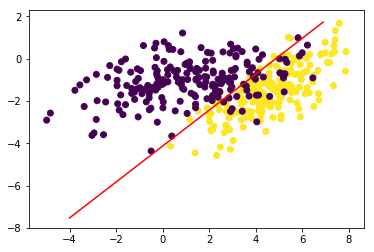

In [31]:

x_naive_1 = np.arange(-4, 7, 0.1)
x_naive_2 = -((logreg.theta[0] + logreg.theta[1]*x_naive_1)/logreg.theta[2])

plt.plot(x_naive_1, x_naive_2, c='red', label='descision boundary naive')
plt.scatter(X[:,0], X[:,1], c=y)

In [103]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10, penalty='l2'):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        bias = np.ones(shape=(X.shape[0],1))
        X_bias = np.append(bias, X, axis=1)
        
        self.theta = np.zeros(X_bias.shape[1])

        for i in range(self.max_epoch):
            z = np.dot(X_bias, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X_bias.T, (h - y)) / y.size
            self.theta -= self.alpha * gradient
       
        
        return self
    
    def fitl1(self, X, y=None):
        '''
        Обучение модели
        '''
        bias = np.ones(shape=(X.shape[0],1))
        X_bias = np.append(bias, X, axis=1)
        
        self.theta = np.zeros(X_bias.shape[1])

        for i in range(self.max_epoch):
            z = np.dot(X_bias, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X_bias.T, (h - y)) / y.size + self.C*np.sign(self.theta)
            self.theta -= self.alpha * gradient
       
        
        return self

    def fitl2(self, X, y=None):
        '''
        Обучение модели
        '''
        bias = np.ones(shape=(X.shape[0],1))
        X_bias = np.append(bias, X, axis=1)
        
        self.theta = np.zeros(X_bias.shape[1])

        for i in range(self.max_epoch):
            z = np.dot(X_bias, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X_bias.T, (h - y)) / y.size + self.C*2*self.theta
            self.theta -= self.alpha * gradient
       
        
        return self

    
    def fitsgd(self, X, y = None):

        bias = np.ones(shape=(X.shape[0],1))
        X_bias = np.append(bias, X, axis=1)

        m = len(X_bias)

        self.theta = np.zeros(X_bias.shape[1])

        for epoch in range(self.max_epoch):
            for i in range(m):
                random_index = np.random.randint(m)
                xi = X_bias[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                
                z = np.dot(xi, self.theta)
                h = self.sigmoid(z)
                gradient = np.dot(xi.T, (h-yi))
                
                #gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
                self.theta -= self.alpha * gradient
                #theta_path_sgd.append(theta)  

    def fitsgdl1(self, X, y = None):

        bias = np.ones(shape=(X.shape[0],1))
        X_bias = np.append(bias, X, axis=1)

        m = len(X_bias)

        self.theta = np.zeros(X_bias.shape[1])

        for epoch in range(self.max_epoch):
            for i in range(m):
                random_index = np.random.randint(m)
                xi = X_bias[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                
                z = np.dot(xi, self.theta)
                h = self.sigmoid(z)
                gradient = np.dot(xi.T, (h-yi))  - self.C*np.sign(self.theta)
                
                #gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
                self.theta -= self.alpha * gradient
                #theta_path_sgd.append(theta)  

    def fitsgdl2(self, X, y = None):

        bias = np.ones(shape=(X.shape[0],1))
        X_bias = np.append(bias, X, axis=1)

        m = len(X_bias)

        self.theta = np.zeros(X_bias.shape[1])

        for epoch in range(self.max_epoch):
            for i in range(m):
                random_index = np.random.randint(m)
                xi = X_bias[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                
                z = np.dot(xi, self.theta)
                h = self.sigmoid(z)
                gradient = np.dot(xi.T, (h-yi))  + self.C*2*self.theta
                
                #gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
                self.theta -= self.alpha * gradient
                #theta_path_sgd.append(theta)  

        
        
        
        
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''

        

        return y_hat_proba

In [41]:
#    def __init__(self, C=1, alpha=0.01, max_epoch=10, penalty='l2'):
logreg2 = MySGDClassifier(alpha=0.1, max_epoch=300000)
logreg2.fit(X,y)


MySGDClassifier(C=1, alpha=0.1, max_epoch=300000, penalty=None)

In [42]:
logreg2.theta

array([-7.92027761,  1.6268891 , -1.91529517])

In [59]:
logreg3 = MySGDClassifier(alpha=0.1, max_epoch=1000)

In [60]:
logreg3.fitsgd(X,y)

In [61]:
logreg3.theta

array([-9.50890801,  1.66051881, -2.43972545])

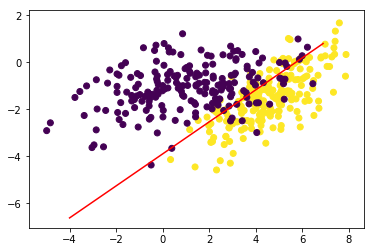

In [62]:
x_1 = np.arange(-4, 7, 0.1)
x_2 = -((logreg3.theta[0] + logreg3.theta[1]*x_naive_1)/logreg3.theta[2])

plt.plot(x_1, x_2, c='red', label='descision boundary naive')
plt.scatter(X[:,0], X[:,1], c=y)

In [88]:
logreg4 = MySGDClassifier(alpha=0.1, max_epoch=500)
logreg4.fitsgdl1(X,y)

In [89]:
logreg4.theta

array([ 0.08208796,  0.26059154, -0.1161947 ])

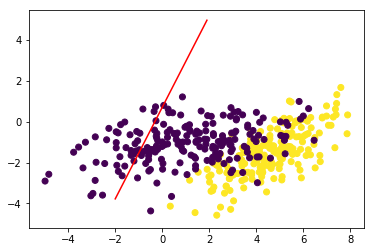

In [90]:
x_1 = np.arange(-2, 2, 0.1)
x_2 = -((logreg4.theta[0] + logreg4.theta[1]*x_1)/logreg4.theta[2])

plt.plot(x_1, x_2, c='red', label='descision boundary naive')
plt.scatter(X[:,0], X[:,1], c=y)

In [100]:
logreg5 = MySGDClassifier(alpha=0.1, max_epoch=500)
logreg5.fitsgdl2(X,y)

In [101]:
logreg5.theta

array([ 0.03821945,  0.25061065, -0.27302007])

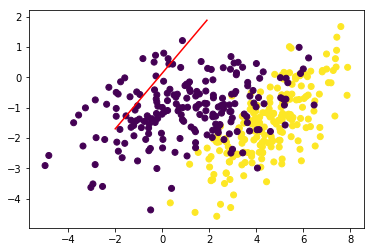

In [102]:
x_1 = np.arange(-2, 2, 0.1)
x_2 = -((logreg5.theta[0] + logreg5.theta[1]*x_1)/logreg5.theta[2])

plt.plot(x_1, x_2, c='red', label='descision boundary naive')
plt.scatter(X[:,0], X[:,1], c=y)

In [113]:
logreg6 = MySGDClassifier(alpha=0.1, max_epoch=30000)
logreg6.fitl2(X,y)

MySGDClassifier(C=1, alpha=0.1, max_epoch=30000, penalty=None)

In [114]:
logreg6.theta

array([-0.0489529 ,  0.1603386 , -0.00454612])

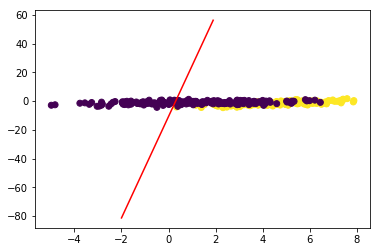

In [115]:
x_1 = np.arange(-2, 2, 0.1)
x_2 = -((logreg6.theta[0] + logreg6.theta[1]*x_1)/logreg6.theta[2])

plt.plot(x_1, x_2, c='red', label='descision boundary naive')
plt.scatter(X[:,0], X[:,1], c=y)